<a href="https://colab.research.google.com/github/PanicLuka/IncidentsRecordApp/blob/main/PPPO_IT67_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uvod**


---


Student: Panić Luka IT67-2018
Predmet: Principi prezentacije i prepoznavanja oblika
Tema projektnog zadatka: Detekcija godina, pola i emocija


---



Duboko učenje poznatije i kao hijerarhijsko učenje, deo je šire porodice metoda mašinskog učenja koje su bazirane na učenju reprezentacije podataka, nasuprot algoritmima koji se baziraju na listama naredbi.Učenje može biti nadgledano, polu-nadgledano ili nenadgledano.

Zbog toga što su neke slike oštećene, različitih veličina, bez lica, nepravilno rasporedjenih podataka, neodgovarajućih formata meta podataka, najpre je odradjeno pretprocesiranje dataset-a.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Priprema podataka**
Učitavanje dataset-a sa drive-a.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_" -O images.zip && rm -rf /tmp/cookies.txt

--2023-01-31 18:08:01--  https://docs.google.com/uc?export=download&confirm=t&id=1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_
Resolving docs.google.com (docs.google.com)... 173.194.79.100, 173.194.79.102, 173.194.79.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4foeq8epgd6qfhp1mr8sect929bovetm/1675188450000/06049624160957438625/*/1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_?e=download&uuid=cec3c84a-6de6-409f-a4ca-b2008a051162 [following]
--2023-01-31 18:08:02--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4foeq8epgd6qfhp1mr8sect929bovetm/1675188450000/06049624160957438625/*/1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_?e=download&uuid=cec3c84a-6de6-409f-a4ca-b2008a051162
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 142.250.145.132,

Unzipovanje učitanog dataset-a.

In [ ]:
!unzip images.zip

Učitavanje fajla sa meta podacima.

In [ ]:
from scipy.io import loadmat

loadmat('/content/wiki_crop/wiki.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

Nakon što je fajl uspešno učitan, konvertuje se u .csv format pomoću biblioteka navedenih u prvih pet linija koda.

In [ ]:
import numpy as np 
from scipy.io import loadmat
import pandas as pd 
import datetime as date
from dateutil.relativedelta import relativedelta 

#prikaz kolona u .csv fajlu
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

#putanja wiki.mat fajla
wiki_mat = '/content/wiki_crop/wiki.mat'

#učitavanje .mat fajla
wiki_data = loadmat(wiki_mat)

#brisanje wiki.mat-a
del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

#računa razliku od datuma rođenja osobe i kada je slika kreirana 
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

#čuvanje podataka u formi dvodimenzionalne tabele
final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

#genrisanje 100% uzorka
meta = meta.sample(frac=1)

#konverzija u .csv format
meta.to_csv('meta.csv', index=False)

time data '829-09-08' does not match format '%Y-%m-%d'
time data '1823-12-00' does not match format '%Y-%m-%d'
time data '1953-10-00' does not match format '%Y-%m-%d'
time data '1984-15-03' does not match format '%Y-%m-%d'
time data '1963-02-00' does not match format '%Y-%m-%d'
time data '1977-04-00' does not match format '%Y-%m-%d'
time data '1946-05-00' does not match format '%Y-%m-%d'
time data '647-05-15' does not match format '%Y-%m-%d'
time data '11-03-00' does not match format '%Y-%m-%d'
time data '1980-05-00' does not match format '%Y-%m-%d'
time data '1960-02-00' does not match format '%Y-%m-%d'
time data '1975-03-00' does not match format '%Y-%m-%d'
time data '1952-11-00' does not match format '%Y-%m-%d'
time data '1974-04-00' does not match format '%Y-%m-%d'
time data '1996-25-05' does not match format '%Y-%m-%d'
time data '1914-02-00' does not match format '%Y-%m-%d'


In [ ]:
data = pd.read_csv('meta.csv')
data.head()


,age,gender,path
0,25,male,wiki_crop/76/3271376_1986-01-26_2012.jpg
1,81,male,wiki_crop/04/34529504_1931-06-16_2013.jpg
2,89,male,wiki_crop/37/2784937_1920-01-24_2010.jpg
3,70,male,wiki_crop/64/795964_1911-12-25_1982.jpg
4,28,female,wiki_crop/79/2723479_1983-01-30_2012.jpg


In [ ]:
data.columns

Index(['age', 'gender', 'path'], dtype='object')

In [ ]:
data.shape

(40216, 3)

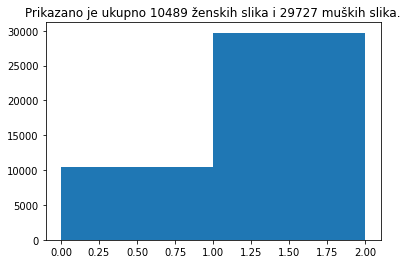

In [ ]:
#prikaz neizbalansiranog dataset-a 
import matplotlib.pyplot as plt #prikaz podataka u obliku histograma

gender = []
for g in data['gender'].values: #proverava se koji je pol u pitanju i dodaje odgovarajućem skupu
    if g == 'male':
        gender.append(1)
    else:
        gender.append(0)
            

plt.hist(gender, range(3))
plt.title('Prikazano je ukupno ' + str(len(gender) - sum(gender)) + ' ženskih slika i ' + str(sum(gender)) + ' muških slika.')
plt.show()

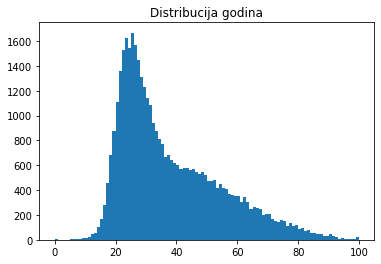

In [ ]:
#sledeći histogram prikazuje distribucije godina
plt.hist(data['age'], range(101))
plt.title('Distribucija godina')
plt.show()

Nakon prikazanih histograma, dalje filtriramo podatke zbog pravilne detekcije godina.

In [ ]:
#neophodni moduli
import pandas as pd #služi za reprezentaciju podataka i manipulaciju sa istima
import numpy as np #višedimenzionalni nizovi i matrice
import cv2 #read i write image-a
import os  #sadrži funkcije za interakciju sa operativnim sistemom
from sklearn.model_selection import train_test_split 

#dataset se učitava
meta = pd.read_csv('meta.csv')

#neophodne samo godine
meta = meta.drop(['gender'], axis=1)

#dataset se filtrira (godine u rasponu od 0 do 101)
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

#podaci se transformišu u numpy array
meta = meta.values

#dataset se deli na trening i testni skup u odnosu 80% - 20%
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

#u ovom code block-u se kreiraju neophodni direktorijumi
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

#trening i testni dataset-ovi se kreiraju
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128)) #vrši se resize-ovanje slike na 128 piksela
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('Procesiranje: '+str(counter) +' Slika: ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('Procesiranje: '+str(counter) +' Slika: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Procesiranje: 3033 Slika: 30
Procesiranje: 3034 Slika: 31
Procesiranje: 3035 Slika: 26
Procesiranje: 3036 Slika: 32
Procesiranje: 3037 Slika: 26
Procesiranje: 3038 Slika: 35
Procesiranje: 3039 Slika: 28
Procesiranje: 3040 Slika: 26
Procesiranje: 3041 Slika: 27
Procesiranje: 3042 Slika: 23
Procesiranje: 3043 Slika: 83
Procesiranje: 3044 Slika: 68
Procesiranje: 3045 Slika: 43
Procesiranje: 3046 Slika: 47
Procesiranje: 3047 Slika: 37
Procesiranje: 3048 Slika: 77
Procesiranje: 3049 Slika: 44
Procesiranje: 3050 Slika: 23
Procesiranje: 3051 Slika: 40
Procesiranje: 3052 Slika: 47
Procesiranje: 3053 Slika: 21
Procesiranje: 3054 Slika: 49
Procesiranje: 3055 Slika: 19
Procesiranje: 3056 Slika: 26
Procesiranje: 3057 Slika: 27
Procesiranje: 3058 Slika: 62
Procesiranje: 3059 Slika: 30
Procesiranje: 3060 Slika: 30
Procesiranje: 3061 Slika: 29
Procesiranje: 3062 Slika: 42
Procesiranje: 3063 Slika: 58
Procesiranje: 3064 Slika: 18
Procesiranje: 3065 Sl

Slično prethodnoj ćeliiji, sada procesuiramo slike za godine.

In [ ]:
import pandas as pd 
import numpy as np 
import cv2
import os
from sklearn.model_selection import train_test_split

meta = pd.read_csv('meta.csv')

#ovde se briše kolona age, u prethodnoj ćeliji smo brisali kolonu gender
meta = meta.drop(['age'], axis=1)

#deli se dataset u odnosu 90% - 10%
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

#kako ne bi dolazilo do problema, usled nejednakosti u broju slika muškog i ženskog pola
#selektuje se isti broj slika u trening skupu
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:]
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

#shuffling dataseta - dakle uzeće i izmešati ceo dataset
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

#kreiraju se neophodni direktorijumi
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

#loading slika u testni i trening skup
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('Procesiranje: '+str(counter) +' Slika: ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('Procesiranje: '+str(counter) +' Slika: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Procesiranje: 16408 Slika: male
Procesiranje: 16409 Slika: male
Procesiranje: 16410 Slika: male
Procesiranje: 16411 Slika: male
Procesiranje: 16412 Slika: male
Procesiranje: 16413 Slika: male
Procesiranje: 16414 Slika: male
Procesiranje: 16415 Slika: male
Procesiranje: 16416 Slika: male
Procesiranje: 16417 Slika: male
Procesiranje: 16418 Slika: male
Procesiranje: 16419 Slika: male
Procesiranje: 16420 Slika: male
Procesiranje: 16421 Slika: male
Procesiranje: 16422 Slika: male
Procesiranje: 16423 Slika: male
Procesiranje: 16424 Slika: male
Procesiranje: 16425 Slika: male
Procesiranje: 16426 Slika: male
Procesiranje: 16427 Slika: male
Procesiranje: 16428 Slika: male
Procesiranje: 16429 Slika: male
Procesiranje: 16430 Slika: male
Procesiranje: 16431 Slika: male
Procesiranje: 16432 Slika: male
Procesiranje: 16433 Slika: male
Procesiranje: 16434 Slika: male
Procesiranje: 16435 Slika: male
Procesiranje: 16436 Slika: male
Procesiranje: 16437 S

# **Model za detekcija pola osobe**

Model je kreiran korišćenjem Keras i TensorFlow biblioteka koje olakšavaju pisanje koda za duboke neuronske mreže.

In [ ]:
!pip install tensorflow
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 4.2 MB/s eta 0:00:00


In [ ]:
#prvo što je neophodno, je import-ovati dependency-ije

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#drugi korak jeste kreiranje modela 

#arhitektura se zasniva na sekvenci slojeva modela
#sekvencijalni model, koji podrazumeva niz slojeva modela
model = Sequential()

#MobileNetV2 jeste sledeći model koji se koristi
#model koji je učitan sa težinama koje su unapred učitane u ImageNet-u
mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

#mobile model se dodaje i konfiguriše se output sloj
#Dense je sloj neuronske mreže koji ima dva neurona, a tip funkcije koja ga aktivira je softmax
model.add(mobile)
model.add(Dense(units=2, activation="softmax"))

#model se kompajlira i navode se optimizatori
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

#podaci o modelu se print-uju
print(model.summary())


#koristi se ImageDataGenerator klasa za data augmentaciju
#omogućenje augmentacije dok se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

#čita se trening skup
#navodi se dimenzija treniranja 
#categorical - je zapravo 2D niz one-hot labela
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#čita se testni skup
test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#za bolje rezultate vrši se prilagođavanje epohe
history1 = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=2,
                    validation_data=test_set,
                    validation_steps=50)

#poslednji korak podrazumeva čuvanje modela
model.save('weights/gender_mobile.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________
None
Found 18808 images belonging to 2 classes.
Found 21408 images belonging to 2 classes.


<ipython-input-15-465ef541b0c3>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(train_generator,


Epoch 1/2
100/100 [==============================] - 326s 3s/step - loss: 0.8883 - accuracy: 0.7020 - val_loss: 0.7591 - val_accuracy: 0.8378
Epoch 2/2
100/100 [==============================] - 318s 3s/step - loss: 0.6286 - accuracy: 0.7806 - val_loss: 0.8142 - val_accuracy: 0.7691


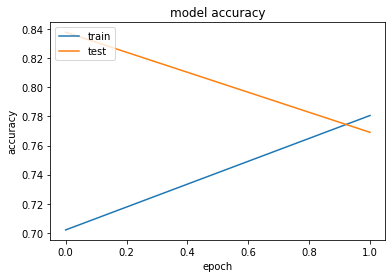

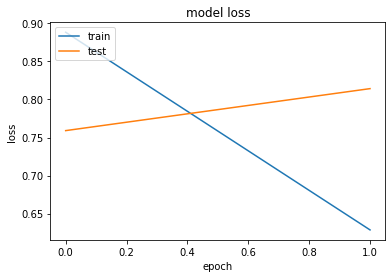

In [ ]:
#nakon što izvršavanje završeno radi se analiza performansi modela
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 31ms/step


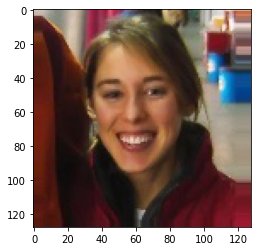

Žensko


In [ ]:
#vrši se provera modela
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array


from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = load_img(filepath, target_size=(128, 128))
  test_img = img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/21/1024.jpg'
gender_pred = model.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

if gender_pred[0][0]>gender_pred[0][1]:
  print('Žensko')
else:
  print('Muško')

# **Model za detekciju godina osobe**

Ovaj model bavi se predvidjanjem broja godina osobe sa slike

In [ ]:
#importovanje dependency-ija
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#kreiranje sekvencijalnog modela
model2 = Sequential()

#drugi tip modela koji se koristi InceptionResNetV2
mobile = InceptionResNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

#dodaje se mobile model
#sloj neuronske mreže sa 102 neurona i tip funkcije aktivacije je softmax
model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))

#model se kompajlira i navode se optimizatori
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

#prikaz podataka
print(model2.summary())

#ImageDataGenerator se koristi za augmentaciju, koja se primenjuje dok se model trenira
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

#trening skup se čita
train_generator = train_datagen.flow_from_directory('dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#testni skup se isčitava
test_set = test_datagen.flow_from_directory('dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#zbog performantnosti se prilagođavaju epohe
history2 = model2.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=2,
                    validation_data=test_set,
                    validation_steps=25)

#model se čuva
model2.save('weights/age_inception.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 102)               156774    
                                                                 
Total params: 54,493,510
Trainable params: 54,432,966
Non-trainable params: 60,544
_________________________________________________________________
None
Found 32129 images belonging to 102 classes.
Found 8033 images belonging to 102 classes.


<ipython-input-36-90002f4acabe>:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_generator,


Epoch 1/2
100/100 [==============================] - 1781s 17s/step - loss: 4.6991 - accuracy: 0.0230 - val_loss: 4.6123 - val_accuracy: 0.0288
Epoch 2/2
100/100 [==============================] - 1729s 17s/step - loss: 4.2817 - accuracy: 0.0375 - val_loss: 4.3035 - val_accuracy: 0.0325


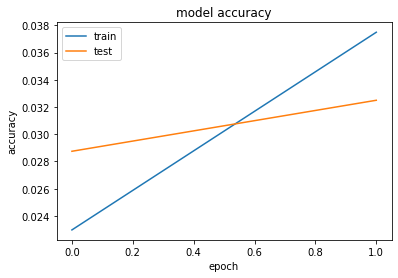

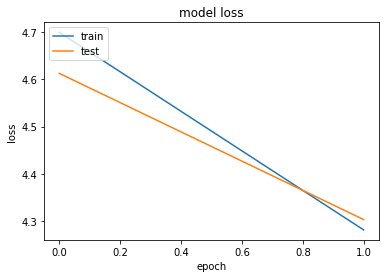

In [ ]:
#analiziraju se performanse modela
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 103ms/step


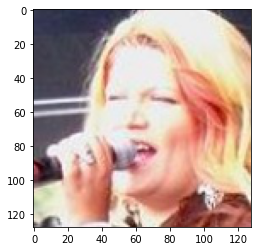

61
50-74 godina


In [ ]:
#rezultati se proveravaju
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array

from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = load_img(filepath, target_size=(128, 128))
  test_img = img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/29/1472.jpg'  
age_pred= model2.predict(loadImage(picture))
img = load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

print(temp) 
if temp in range(0, 24):
  print('0-24 godina')
if temp in range(25, 49):
  print('25-49 godina')
if temp in range(50, 74):
  print('50-74 godina')
if temp in range(75, 99):
  print('75-99 godina')
if temp in range(91, 101):
  print('91-101 godina')

Instalcija DeepFace biblioteke

In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=ce6c9e542fddd4a151146de0ef68c1026bc2f286605cb66aca6460f1f2a34464
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


# **Model za detekciju emocija osobe**

Korišćenjem DeepFace biblioteke detektujemo emocije osobe sa slike.

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


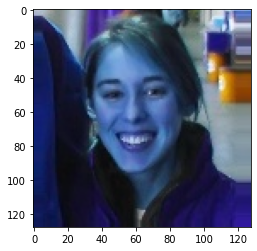

In [ ]:
import cv2
from deepface import DeepFace
img = cv2.imread('/content/dataset/age/test/21/1024.jpg')
import matplotlib.pyplot as plt
plt.imshow(img) #prikazaće plavu nijasnu 

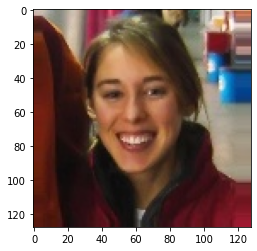

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #vraćanje slike na prirodan ten

In [ ]:
predictions = DeepFace.analyze(img) #analiza slike

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 15.1MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:39<00:00, 13.5MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:57<00:00, 9.28MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:45<00:00, 11.7MB/s]
Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]


In [ ]:
predictions #prikaz predviđenih vrednosti za definisana obeležja, od interesa samo dominant_emotion

[{'emotion': {'angry': 0.6662973134247847,
   'disgust': 0.13817468084691054,
   'fear': 0.19455169090191668,
   'happy': 92.98074799661326,
   'sad': 2.8783544751020953,
   'surprise': 0.04023682507700921,
   'neutral': 3.101634791590857},
  'dominant_emotion': 'happy',
  'region': {'x': 26, 'y': 23, 'w': 67, 'h': 67},
  'age': 26,
  'gender': {'Woman': 28.077203035354614, 'Man': 71.92280292510986},
  'dominant_gender': 'Man',
  'race': {'asian': 11.624730378389359,
   'indian': 1.6653969883918762,
   'black': 0.36778668873012066,
   'white': 49.082887172698975,
   'middle eastern': 13.558770716190338,
   'latino hispanic': 23.700425028800964},
  'dominant_race': 'white'}]

In [ ]:
type(predictions)

list

In [ ]:
for index, element in enumerate(predictions):
        print(element["dominant_emotion"])



happy


In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
print(faceCascade.empty())

False


In [ ]:
#pokušaj da se kreira zeleni četvorougao oko lica osobe
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x, y, w, h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

In [ ]:
#dodavanje neophodnog teksta raspoloženja na slici
font = cv2.FONT_HERSHEY_SIMPLEX

for index, element in enumerate(predictions):
        dominantEmotion = element["dominant_emotion"]



cv2.putText(img, 
            dominantEmotion,
            (0,120),
            font,
            1,
            (0, 0, 255),
            2,
            cv2.LINE_4)

array([[[185, 198, 206],
        [191, 201, 211],
        [193, 195, 213],
        ...,
        [144, 187, 244],
        [144, 183, 251],
        [144, 181, 255]],

       [[177, 188, 202],
        [176, 184, 201],
        [180, 186, 205],
        ...,
        [ 76, 117, 180],
        [ 76, 113, 187],
        [ 76, 112, 190]],

       [[178, 182, 210],
        [171, 178, 203],
        [171, 182, 204],
        ...,
        [ 74, 112, 190],
        [ 76, 109, 195],
        [ 76, 108, 197]],

       ...,

       [[ 13,  27,  86],
        [ 15,  26,  86],
        [ 17,  26,  90],
        ...,
        [ 48,  25, 157],
        [ 48,  24, 158],
        [ 48,  24, 160]],

       [[ 15,  26,  86],
        [ 15,  26,  86],
        [ 17,  26,  90],
        ...,
        [ 48,  24, 160],
        [ 48,  23, 161],
        [ 48,  23, 161]],

       [[ 15,  26,  86],
        [ 14,  25,  85],
        [ 16,  25,  89],
        ...,
        [ 48,  24, 160],
        [ 48,  22, 162],
        [ 48,  22, 162]]

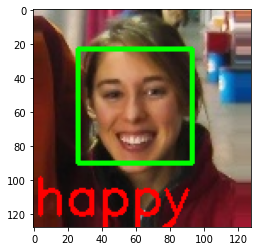

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# **Zaključak**

Izrada projekta je bila veoma interesentno.Malo naporniji proces je bilo samo procesuiranje i čišćenje podataka i detekcija emocija.Sve u svemu veoma lep dataset i smatram lepa implementacija sa moje strane.

# **Reference**



*   https://keras.io/

*   Materijali sa vežbi

*   dataset: https://drive.google.com/file/d/1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_/view?usp=sharing

*   https://sr.m.wikipedia.org/sr-ec/%D0%94%D1%83%D0%B1%D0%BE%D0%BA%D0%BE_%D1%83%D1%87%D0%B5%D1%9A%D0%B5









